# Ninad Karlekar
# Project Name — Create recommendation system for online retail data using python

## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Data Preparation
- Exploratory data analysis
- Data Pre-Processing
- Model Building
- Conclusion

## 1) Problem statement
- Create recommendation system for online retail data using python

## 2) Data Collection
Dataset Source -
https://www.kaggle.com/datasets/puneetbhaya/online-retail

### 2.1 Import Data and Required Packages

In [34]:
#Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import PowerTransformer, StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings as wg
wg.filterwarnings("ignore")

### 2.2 Importing datasets

In [3]:
# File path of the dataset
file_path = 'Dataset/OnlineRetail.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first 5 rows of the dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### Let's get stastical information about the dataset

In [4]:
#number of rows and columns
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
# Get the column names of the DataFrame
column_names = df.columns

# Display the column names
print(column_names)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


### 2.3 Dataset information

- `InvoiceNo`: This is the number that identifies a transaction.
- `Stock Code`: This refers to the product ID.
- `Description`: This describes the product that a user purchased.
- `Quantity`: It specified the quantity of the item purchased.
- `InvoiceDate`: The date on which the transaction took place.
- `UnitPrice`: Price of one product.
- `CustomerID`: It identifies the customer.
- `Country`: The country where the transaction was performed.

## 3. Data Checks to perform

- Check for proper format of data
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check for proper format of data

In [7]:
#Ensure that the data type in the InvoiceNo column is in the form of a string.
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [8]:
df.sort_values('InvoiceNo', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


**`Transactions`** with **`InvoiceNo`** starting with the letter `'C'` denote **canceled transactions**, and **we will remove this data** from our analysis as we are only interested in analyzing successful transactions.

In [9]:
# Create a new column and assign it the result of the lambda function applied to the InvoiceNo column
df['Is_C_Present'] = (
    df['InvoiceNo']
    .astype(str)  # Convert the column to string type
    .apply(lambda x: 1 if x.startswith('C') else 0))  # Apply the lambda function to check if the string starts with 'C' and return 1 if true, 0 if false

# Create the "Is_C_Present" column
df['Is_C_Present'] = df['InvoiceNo'].astype(str).apply(lambda x: 1 if x.startswith('C') else 0)

# Select all rows where Is_C_Present equals 0
df = df[df['Is_C_Present'] == 0]

# Drop the "Is_C_Present" column
df.drop('Is_C_Present', axis=1, inplace=True)

# Display the updated DataFrame
df.sort_values('InvoiceNo', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


### 3.2 Check Missing values (Find percentage of missing data)

In [10]:
def missingvalue(data):
    missing_value = data.isnull().sum(axis = 0).reset_index()
    missing_value.columns = ['variable', 'number_of_missing']
    missing_value['percentage_of_missing'] = (missing_value['number_of_missing'])/data.shape[0]*100
    mv = missing_value.sort_values('percentage_of_missing', ascending = False).reset_index(drop=True)
    return mv
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,CustomerID,134697,25.289465
1,Description,1454,0.272990
2,InvoiceNo,0,0.000000
3,StockCode,0,0.000000
4,Quantity,0,0.000000
5,InvoiceDate,0,0.000000
6,UnitPrice,0,0.000000
7,Country,0,0.000000


- The `CustomerID` and `Description` columns contain **missing values**. Given the large size of the data, **dropping the missing values will not have any significant impact on the size of the dataset**.

-   It is not feasible to fill the missing values for `CustomerID` and `Description` as it could potentially affect the analysis performed later.

In [11]:
# Dropping rows with missing values in CustomerID and Description columns as they are crucial for analysis and cannot be imputed.
df = df.dropna(subset = ['CustomerID', 'Description'])
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,InvoiceNo,0,0.0
1,StockCode,0,0.0
2,Description,0,0.0
3,Quantity,0,0.0
4,InvoiceDate,0,0.0
5,UnitPrice,0,0.0
6,CustomerID,0,0.0
7,Country,0,0.0


### 3.3 Check Duplicates

In [12]:
# Check for duplicates based on all columns
duplicates = df[df.duplicated()]

# Display the duplicate rows
print(duplicates)

       InvoiceNo StockCode                        Description  Quantity   
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1  \
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900     SET 2 TEA TOWELS I LOVE LONDON         1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992              REVOLVER WOODEN RULER         1   
541699    581538     22694                        WICKER STAR         1   
541701    581538     23343        JUMBO BAG VINTAGE CHRISTMAS         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

In [13]:
# Remove duplicates based on all columns
df = df.drop_duplicates()

# Display the updated DataFrame
print(df)

       InvoiceNo StockCode                          Description  Quantity   
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
541906    581587     23254         CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

### 3.4 Check data types

In [14]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### 3.5 Checking the number of unique values of each column

In [15]:
df.nunique()

InvoiceNo      18536
StockCode       3665
Description     3866
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

### 3.6 Check statistics of data set

In [16]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.588420,NaN,22.240725,1713.567773


In [17]:
#Remove spaces at the beginning or end of sentences
df['Description'] = df['Description'].str.strip()

## Exploratory Data Analysis

1. Which are popular items purchased by user globally?
2. Which are popular items purchased by user Country-Wise?
3. Which are popular items purchased by user Month-Wise?

### 1. Which are popular items purchased by user globally?

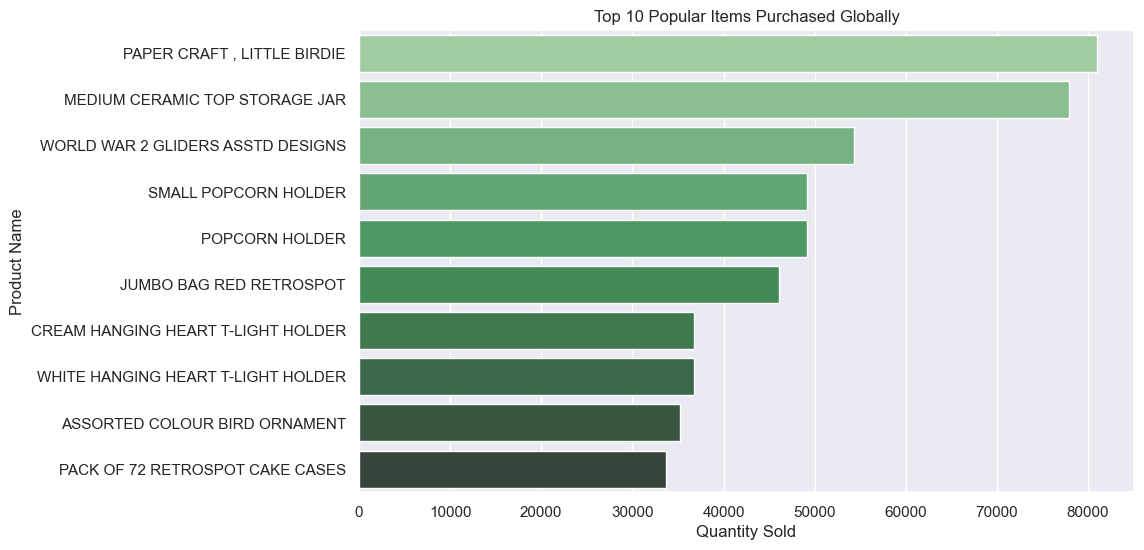

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the DataFrame by StockCode and sum the Quantity for each item
item_counts = df.groupby('StockCode')['Quantity'].sum().reset_index()

# Join the item descriptions with the item_counts DataFrame
item_counts = pd.merge(item_counts, df[['StockCode', 'Description']].drop_duplicates(), on='StockCode')

# Sort the items by their popularity (total quantity sold)
top_items = item_counts.sort_values('Quantity', ascending=False).head(10)

# Create a horizontal bar chart of the top 10 items
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Description', data=top_items, palette='Greens_d')
plt.title('Top 10 Popular Items Purchased Globally')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()



<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- The visualization shows the top 10 popular items purchased globally in the Online Retail dataset.
- The items are ranked based on the total quantity sold, which is calculated by grouping the DataFrame by product name and summing the Quantity for each item.
- The chart shows that the most popular item is **`'PAPER CRAFT , LITTLE BIRDIE'`**, which has sold over **81,000 units**, followed by **`'MEDIUM CERAMIC TOP STORAGE JAR'`**, which has sold over **78,000 units**. The remaining eight items in the top 10 have sold between 30,000 and 60,000 units.
    
</p>
</div>

### 2. Which are popular items purchased by user Country-Wise?

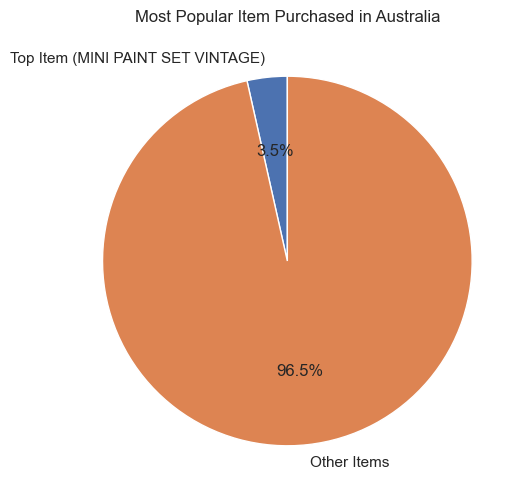

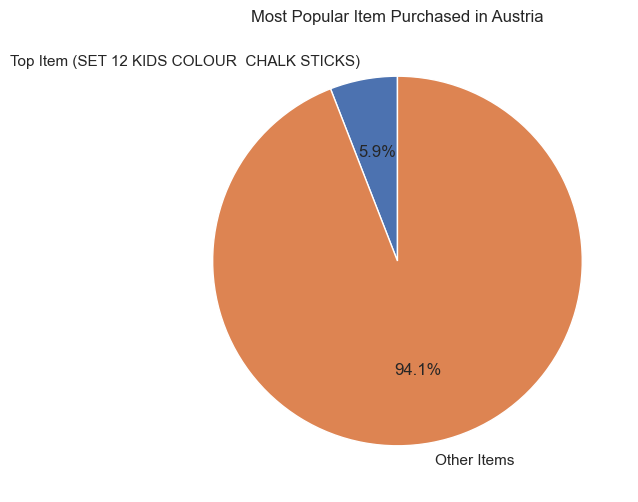

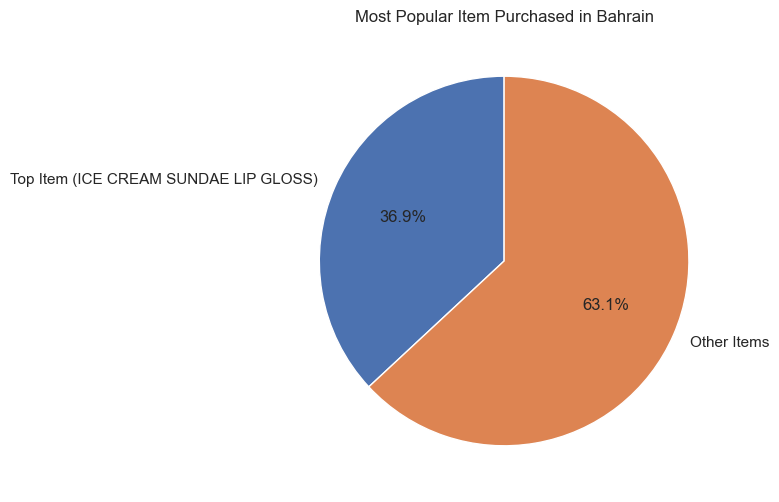

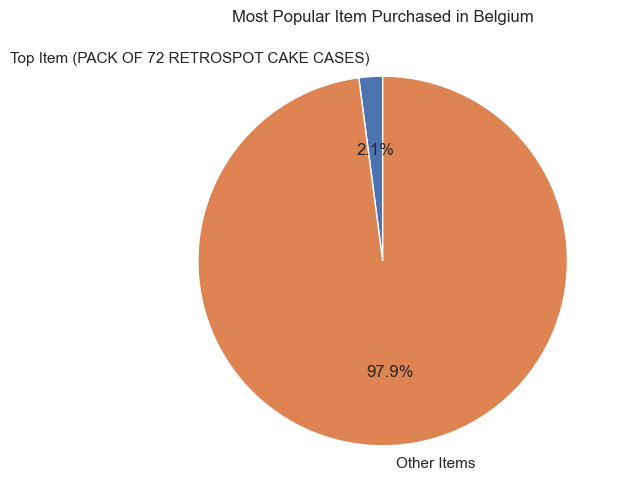

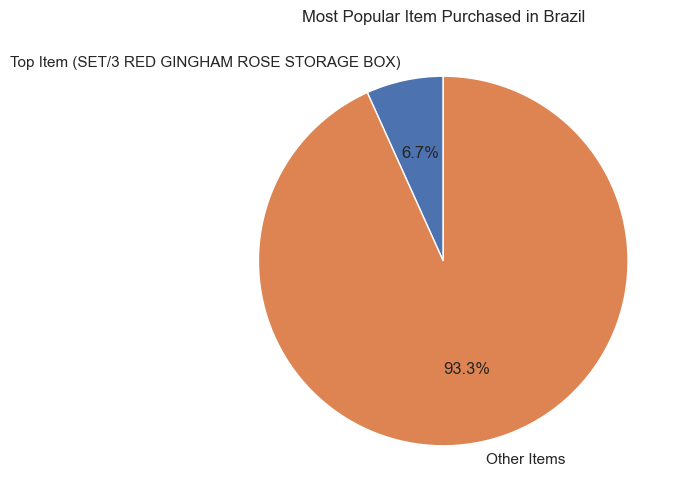

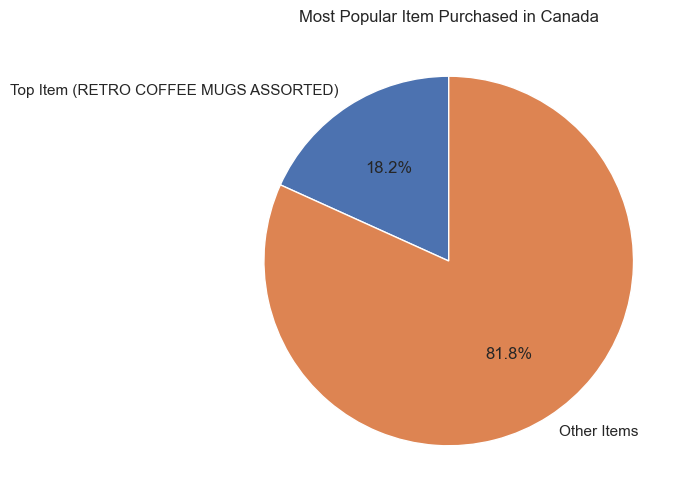

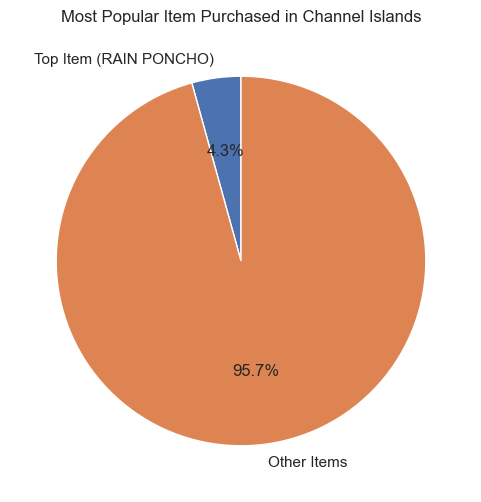

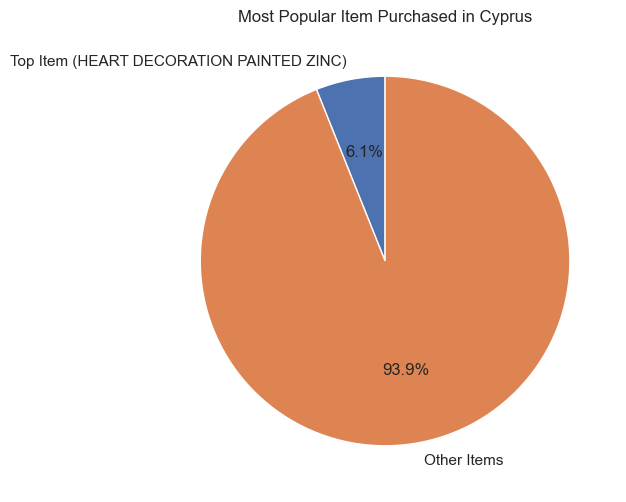

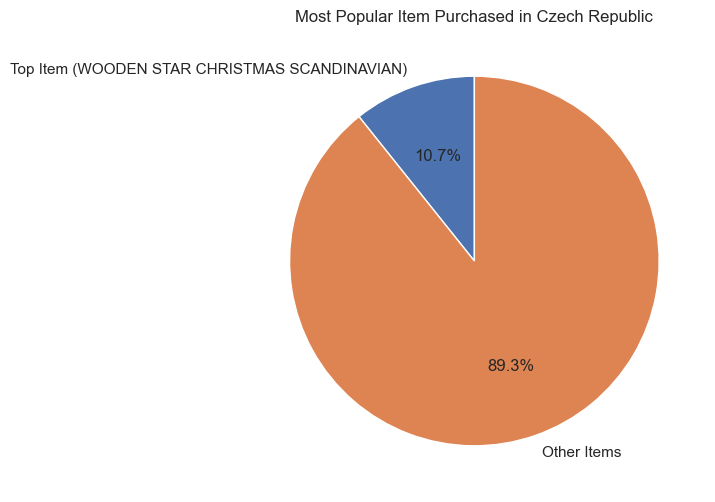

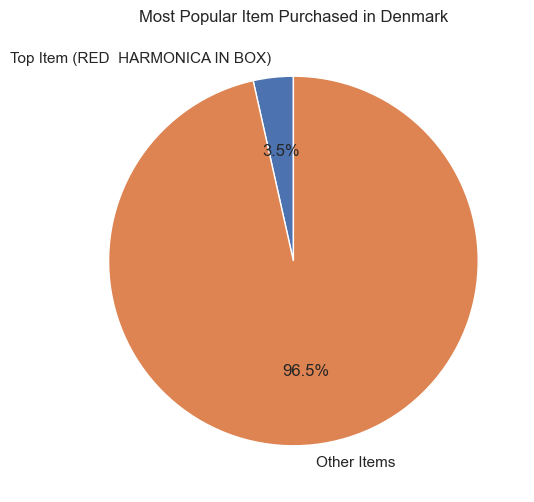

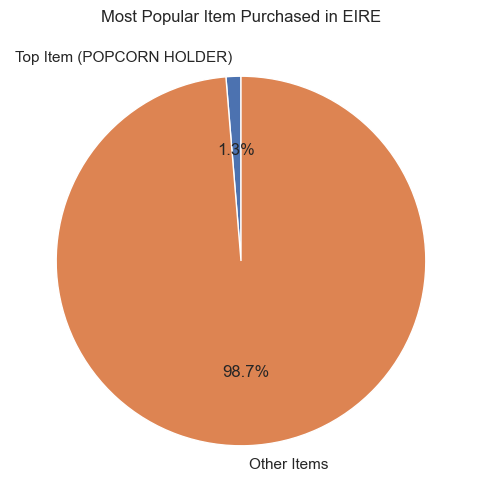

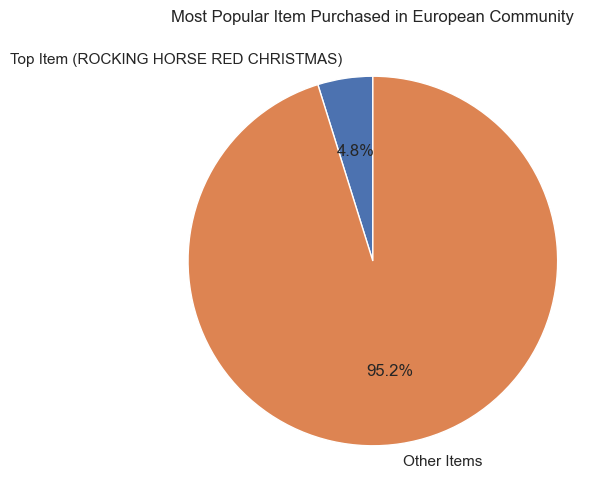

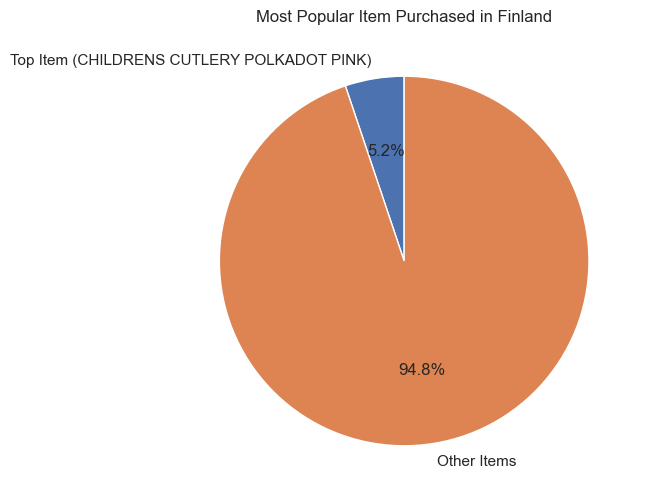

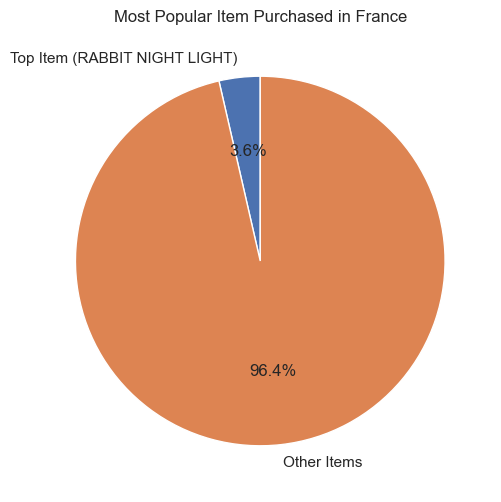

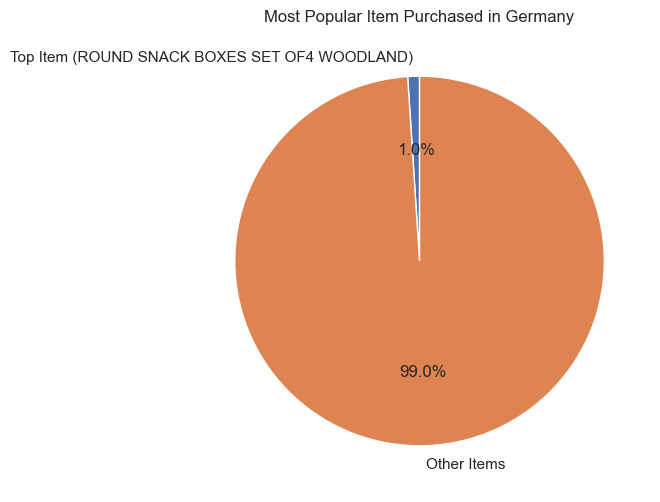

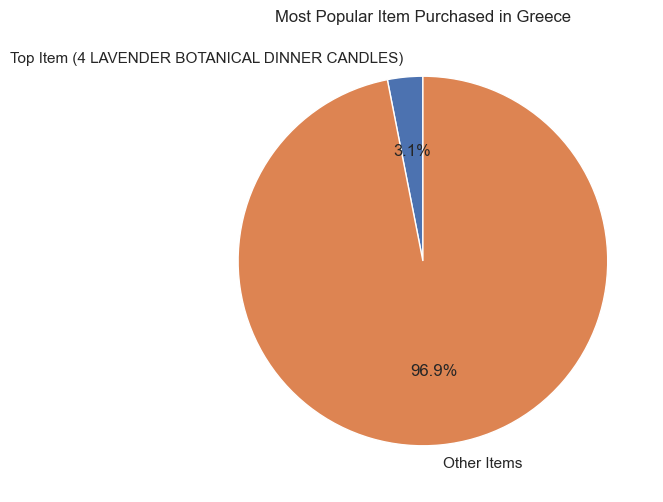

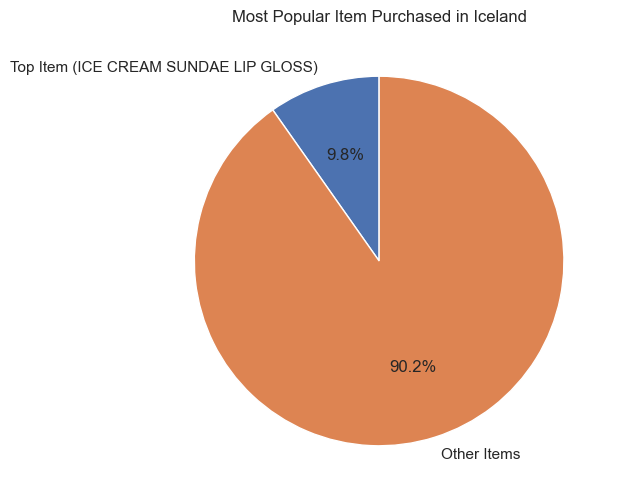

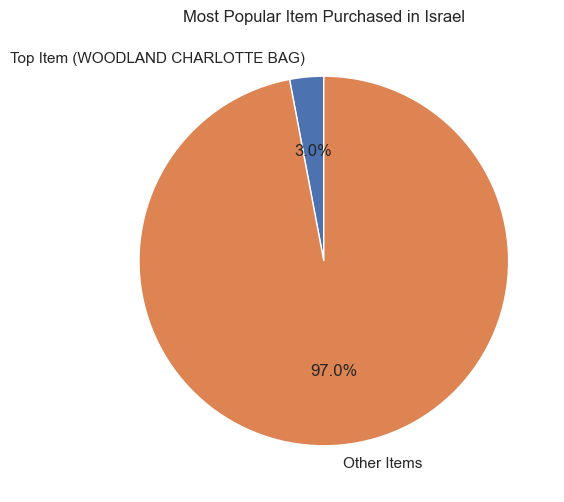

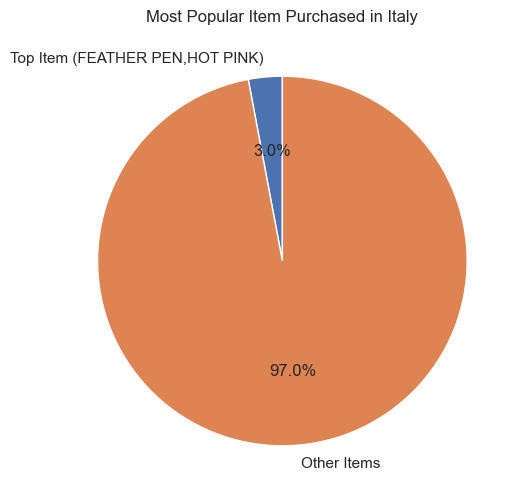

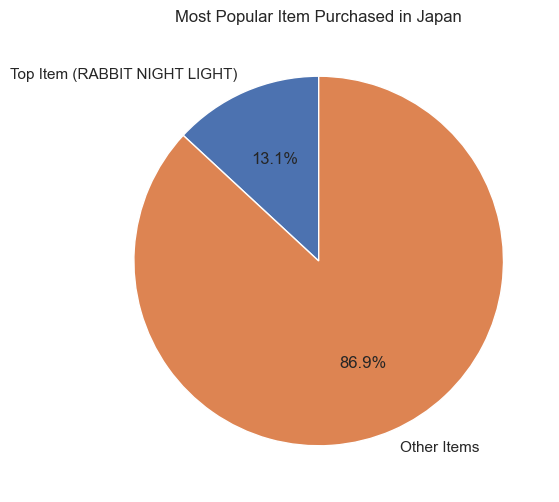

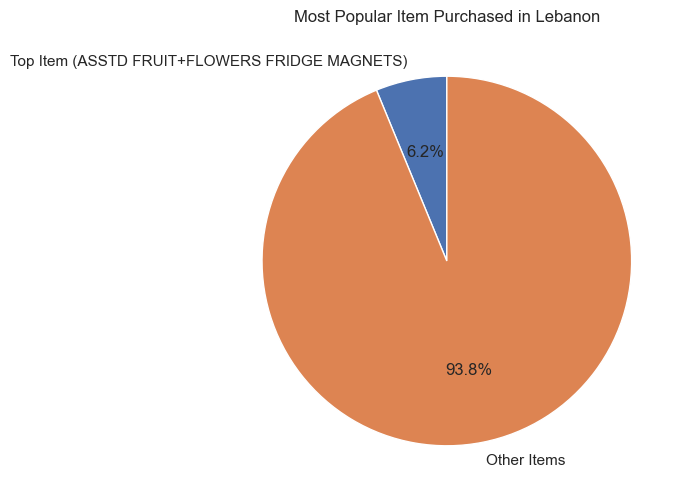

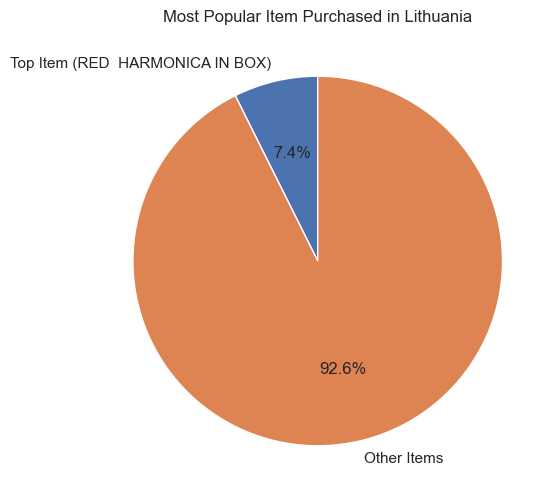

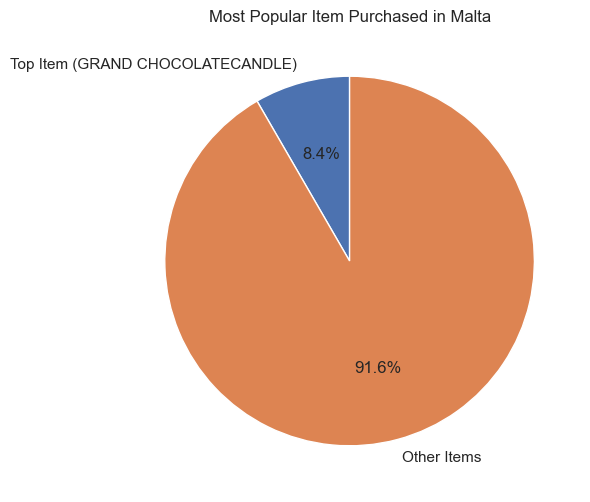

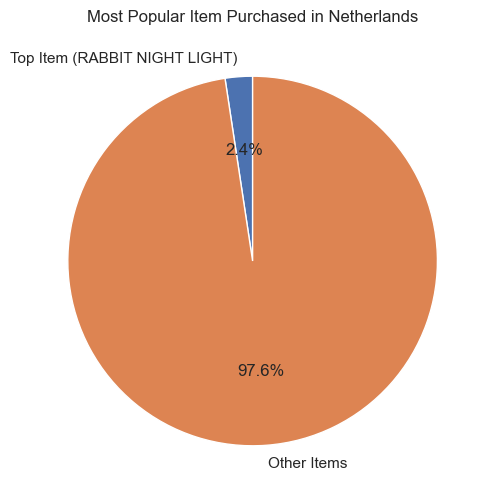

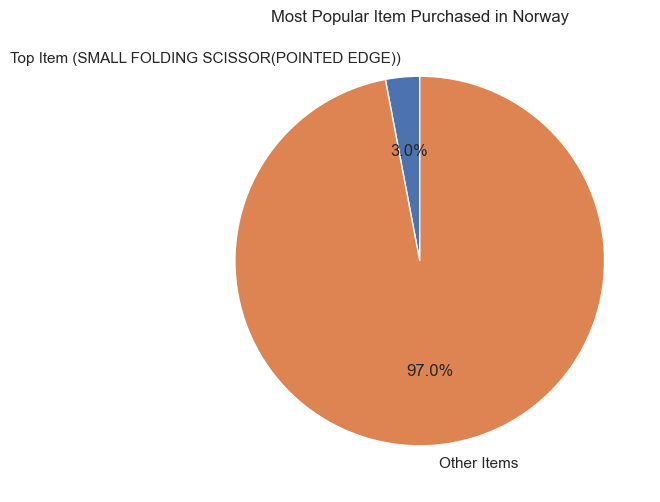

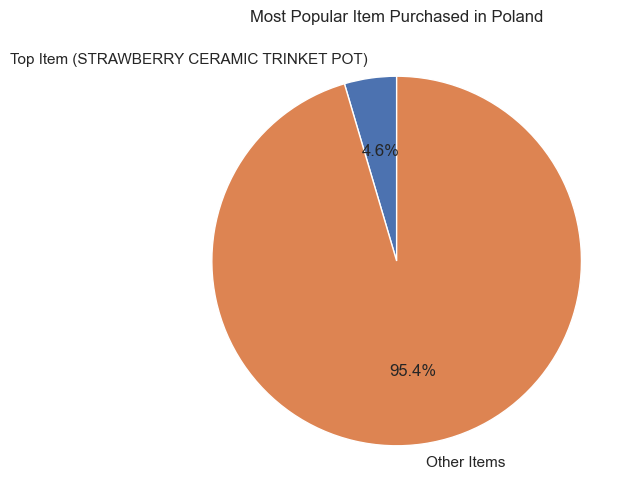

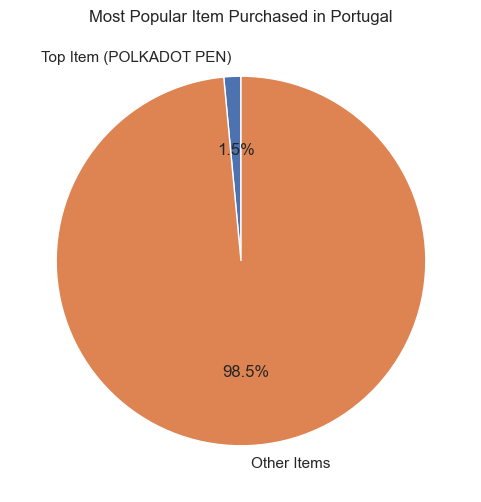

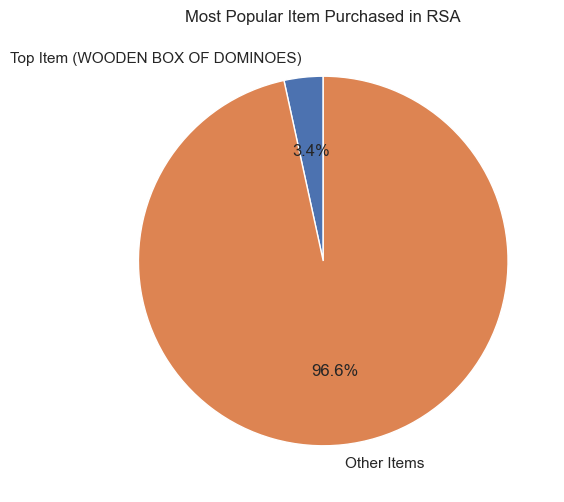

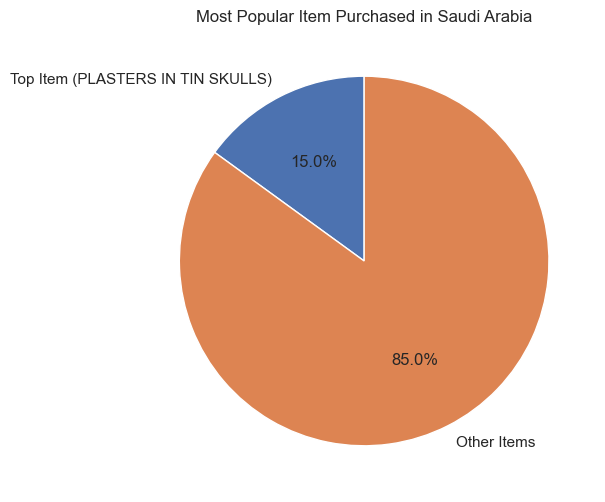

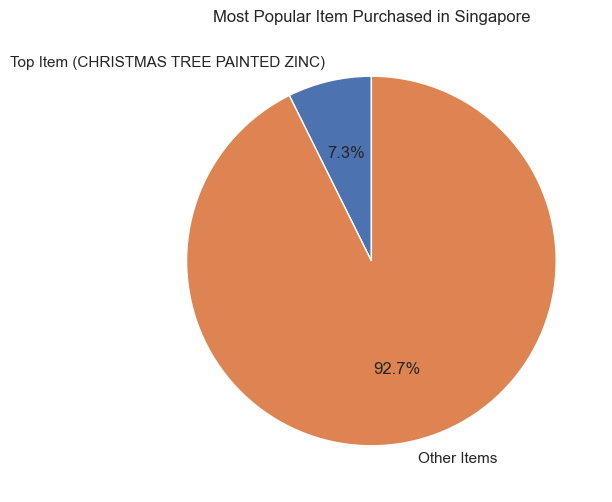

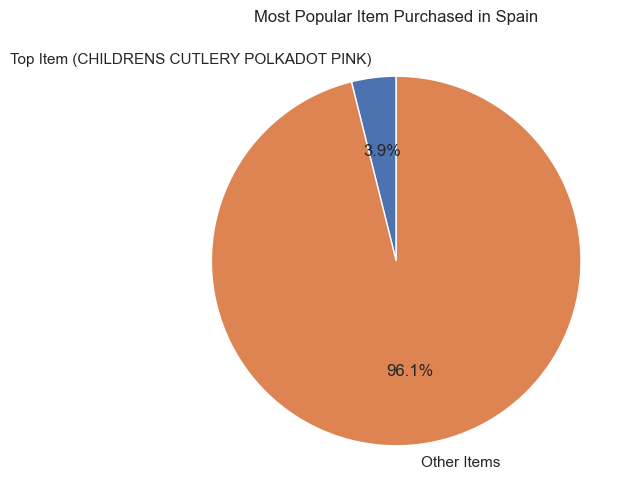

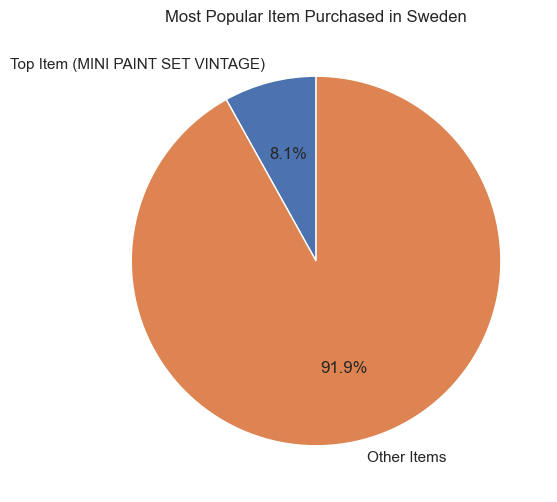

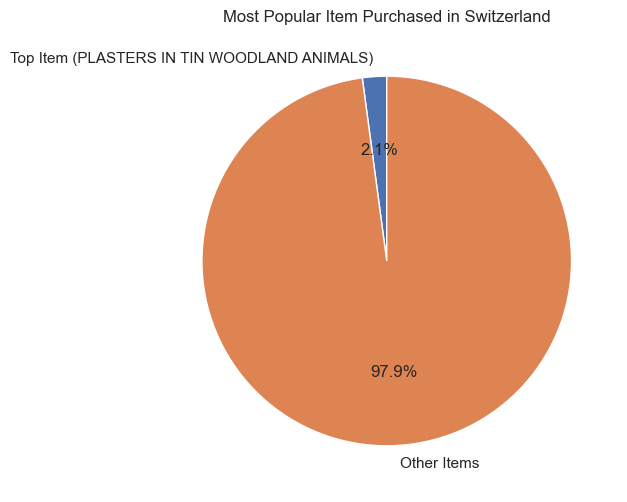

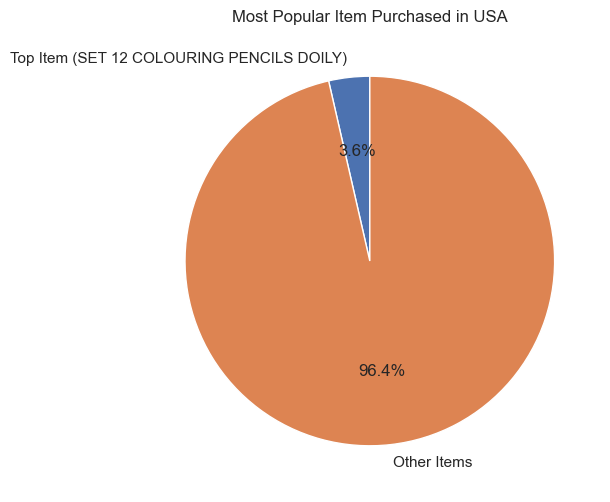

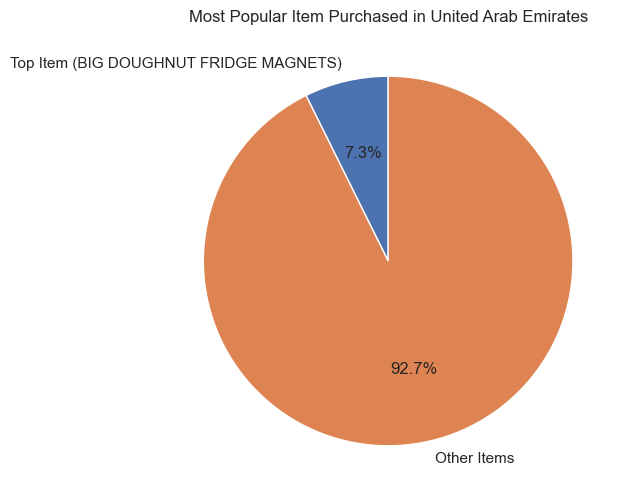

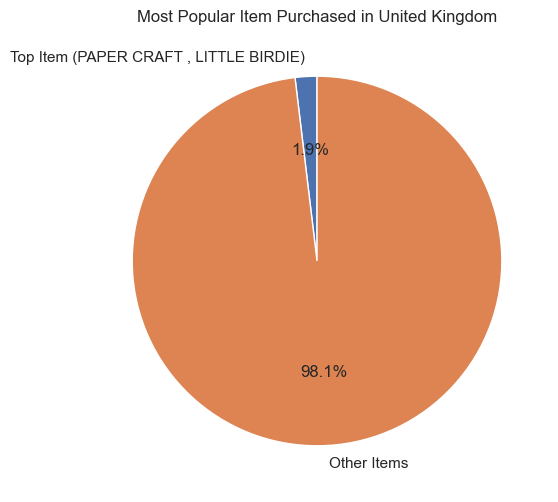

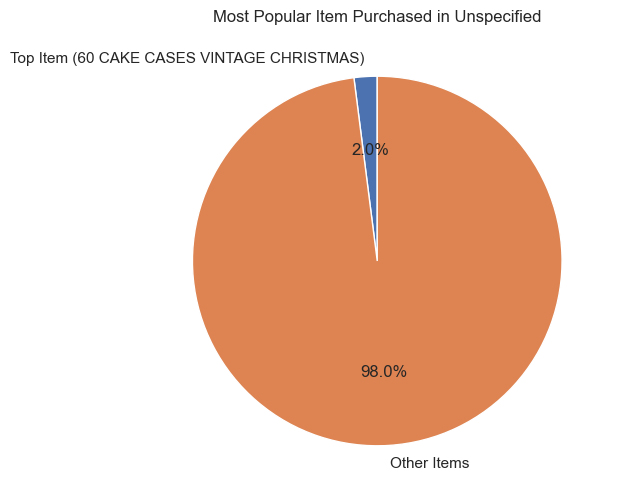

In [19]:
import matplotlib.pyplot as plt

# Group the DataFrame by Country and StockCode and sum the Quantity for each combination
item_counts = df.groupby(['Country', 'StockCode'])['Quantity'].sum().reset_index()

# Get the top item for each country
top_items = item_counts.groupby('Country').apply(lambda x: x.nlargest(1, 'Quantity')).reset_index(drop=True)

# Create a dictionary mapping each StockCode to its corresponding product name
stockcode_to_name = dict(zip(df['StockCode'], df['Description']))

# Plot a pie chart for each country
for country in top_items['Country']:
    # Get the top item for the current country
    top_item = top_items[top_items['Country'] == country]
    stockcode = top_item.iloc[0]['StockCode']
    quantity = top_item.iloc[0]['Quantity']
    # Get the product name for the current StockCode
    product_name = stockcode_to_name[stockcode]
    # Get the quantity for the other items in the current country
    other_quantity = item_counts[(item_counts['Country'] == country) & (item_counts['StockCode'] != stockcode)]['Quantity'].sum()
    # Create the data for the pie chart
    data = [quantity, other_quantity]
    labels = [f'Top Item ({product_name})', 'Other Items']
    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Most Popular Item Purchased in {country}')
    plt.show()



<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

<h3>Most popular items in each country are as follows:- </h3>

- **`Australia`** -> **MINI PAINT SET VINTAGE**
- **`Austria`** -> **SET 12 KIDS  WHITE CHALK STICKS**
- **`Bahrain`** -> **ICE CREAM SUNDAE LIP GLOSS**
- **`Belgium`** -> **PACK OF 72 RETROSPOT CAKE CASES**
- **`Brazil`** -> **SET/3 RED GINGHAM ROSE STORAGE BOX**
- **`Canada`** -> **RETRO COFFEE MUGS ASSORTED**
- **`Channel Islands`** -> **RAIN PONCHO**
- **`Cyprus`** -> **HEART DECORATION PAINTED ZINC**
- **`Czech Republic`** -> **WOODEN STAR CHRISTMAS SCANDINAVIAN**
- **`Denmark`** -> **RED HARMONICA IN BOX**
- **`EIRE`** -> **POPCORN HOLDER**
- **`European Community`** -> **ROCKING HORSE RED CHRISTMAS**
- **`Finland`** -> **PINK POLKADOT CHILDRENS UMBRELLA**
- **`France`** -> **RABBIT NIGHT LIGHT**
- **`Germany`** -> **ROUND SNACK BOXES SET OF4 WOODLAND**
- **`Greece`** -> **4 LAVENDER BOTANICAL DINNER CANDLES**
- **`Iceland`** -> **ICE CREAM SUNDAE LIP GLOSS**
- **`Israel`** -> **WOODLAN CHARLOTTE BAG**
- **`Italy`** -> **FEATHER PEN,LIGHT PINK**
- **`Japan`** -> **RABBIT NIGHT LIGHT**
- **`Lebanon`** -> **ASSTD FRUIT+FLOWERS FRIDGE MAGNETS**
- **`Lithuania`** -> **RED HARMONICA IN BOX**
- **`Malta`** -> **GRAND CHOCOLATECANDLE**
- **`Netherlands`** -> **RABBIT NIGHT LIGHT**
- **`Norway`** -> **SMALL FOLDING SCISSOR(POINTED EDGE)**
- **`Poland`** -> **STRAWBERRY CERAMIC TRINKET POT**
- **`Portugal`** -> **POLKADOT PEN**
- **`RSA`** -> **WOODEN BOX OF DOMINOES**
- **`Saudi Arabia`** -> **PLASTERS IN TIN SKULLS**
- **`Singapore`** -> **CHRISTMAS TREE PAINTED ZINC**
- **`Spain`** -> **CHILDRENS CUTLERY POLKADOT PINK**
- **`Sweden`** -> **MINI PAINT SET VINTAGE**
- **`Switzerland`** -> **PLASTERS IN TIN WOODLAND ANIMALS**
- **`USA`** -> **SET 12 COLOURING PENCILS DOILY**
- **`United Arab Emirates`** -> **BIG DOUGHNUT FRIDGE MAGNETS**
- **`United Kingdom`** -> **PAPER CRAFT , LITTLE BIRDIE**
- **`Unspecified`** -> **60 CAKE CASES VINTAGE CHRISTMAS**


</p>
</div>

In [20]:
# Check the data types of all columns
print(df.dtypes)

# If the InvoiceDate column does not exist or has a different name, you can rename it like this
df = df.rename(columns={'InvoiceDateColumn': 'InvoiceDate'})

# Convert the InvoiceDate column to datetime if necessary
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


### 3. Which are popular items purchased by user Month-Wise?

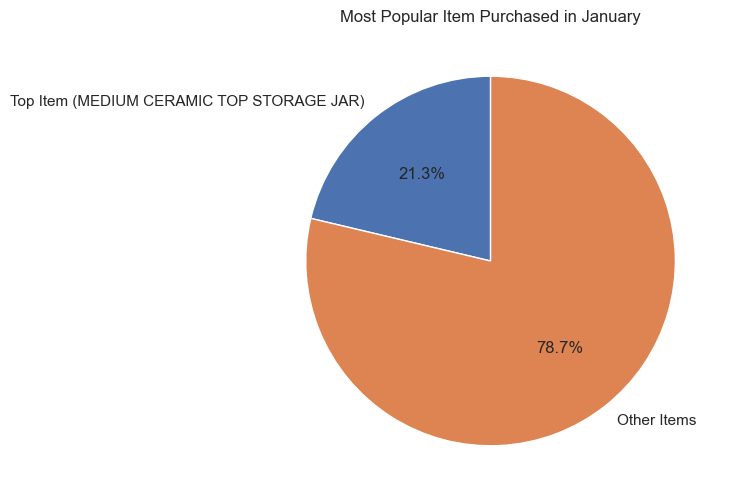

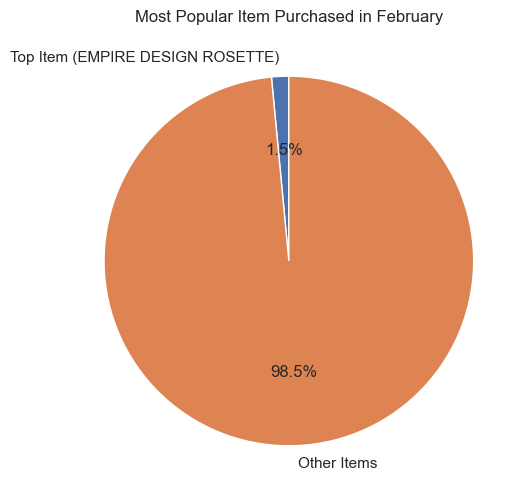

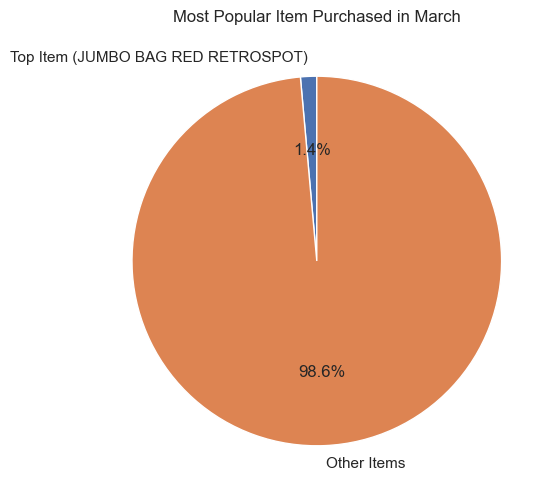

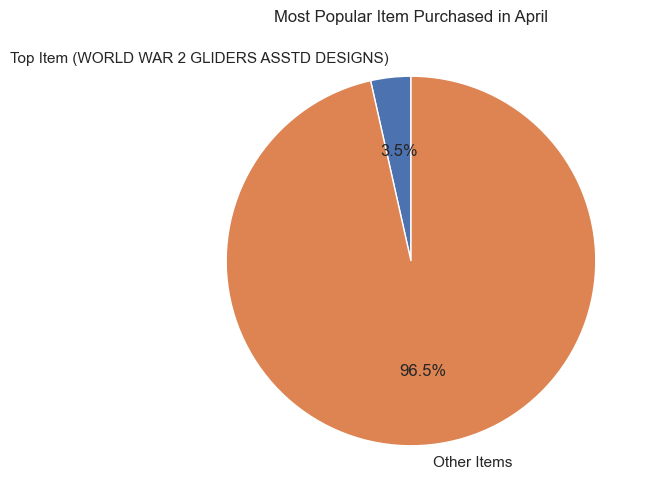

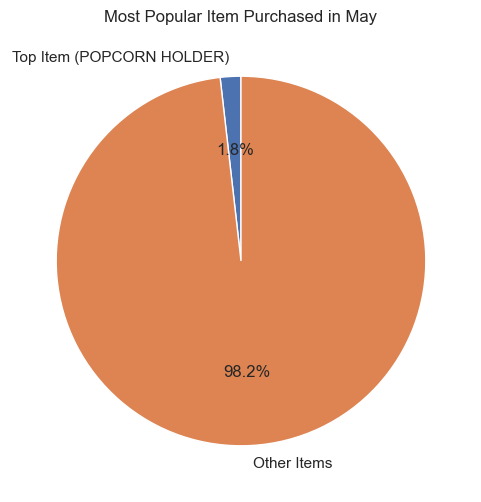

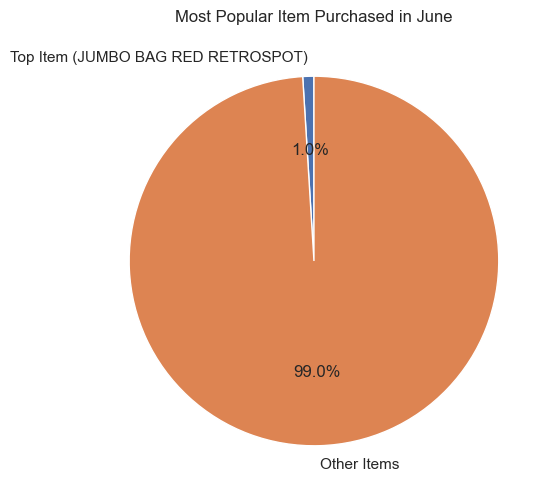

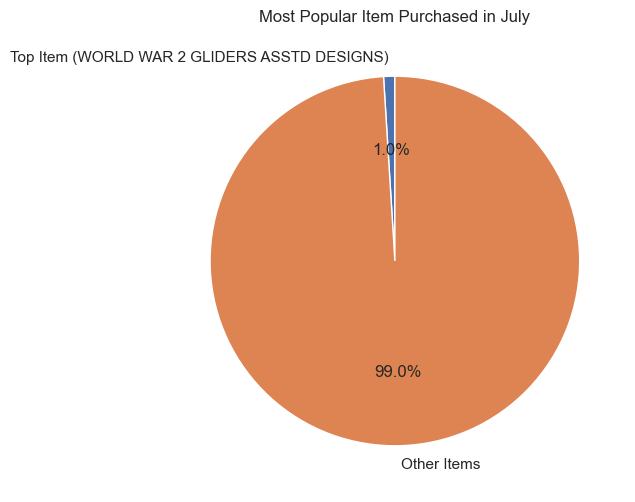

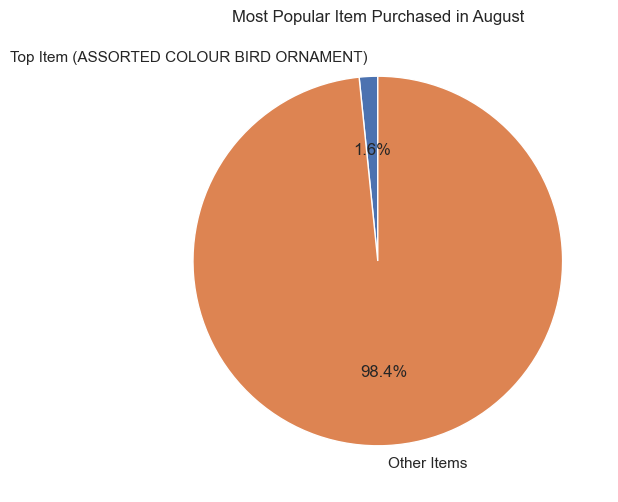

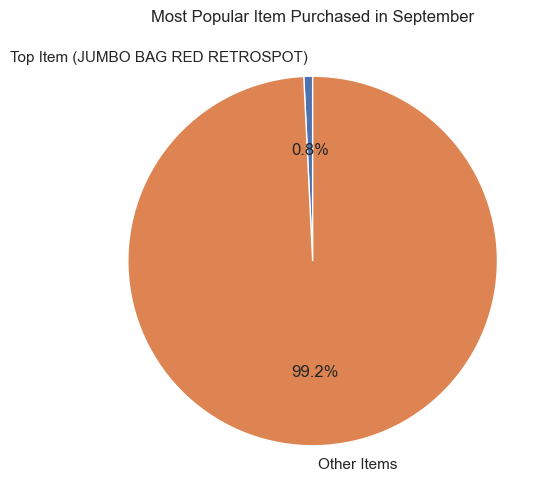

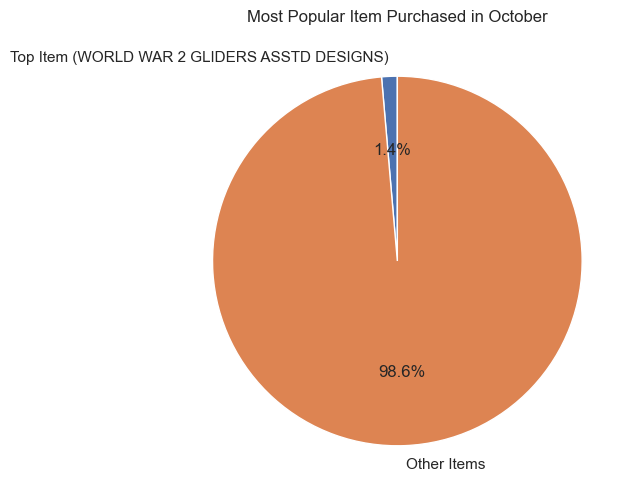

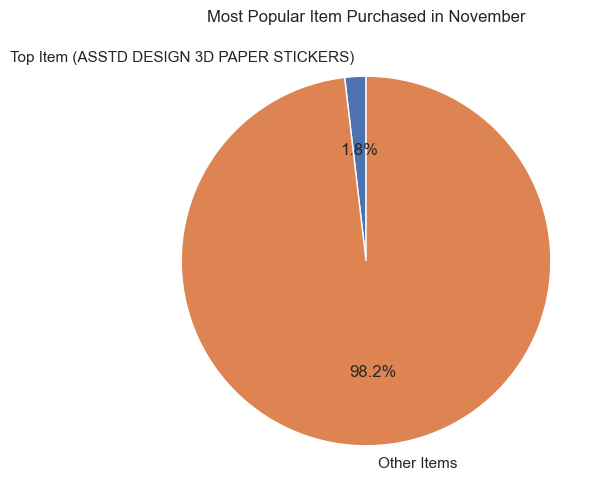

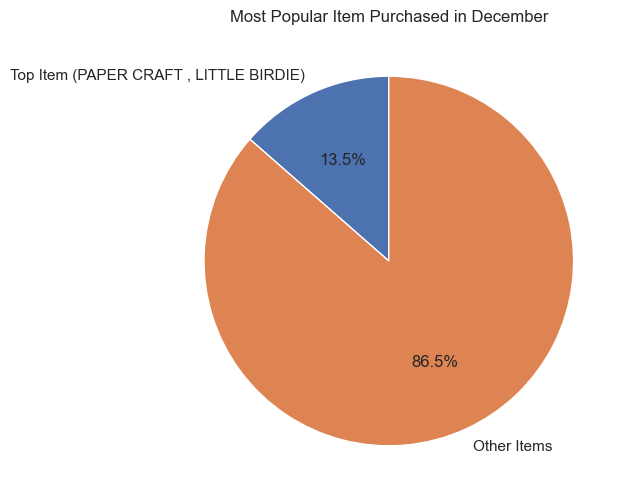

In [21]:
import matplotlib.pyplot as plt

# Define a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group the DataFrame by month and StockCode and sum the Quantity for each combination
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
item_counts = df.groupby(['InvoiceMonth', 'StockCode'])['Quantity'].sum().reset_index()

# Get the top item for each month
top_items = item_counts.groupby('InvoiceMonth').apply(lambda x: x.nlargest(1, 'Quantity')).reset_index(drop=True)

# Create a dictionary mapping each StockCode to its corresponding product name
stockcode_to_name = dict(zip(df['StockCode'], df['Description']))

# Plot a pie chart for each month
for month in top_items['InvoiceMonth']:
    # Get the top item for the current month
    top_item = top_items[top_items['InvoiceMonth'] == month]
    stockcode = top_item.iloc[0]['StockCode']
    quantity = top_item.iloc[0]['Quantity']
    # Get the product name for the current StockCode
    product_name = stockcode_to_name[stockcode]
    # Get the quantity for the other items in the current month
    other_quantity = item_counts[(item_counts['InvoiceMonth'] == month) & (item_counts['StockCode'] != stockcode)]['Quantity'].sum()
    # Create the data for the pie chart
    data = [quantity, other_quantity]
    labels = [f'Top Item ({product_name})', 'Other Items']
    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Most Popular Item Purchased in {month_names[month-1]}')
    plt.show()



<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

<h3>Most popular items in each month are as follows:- </h3>

- **`January`** -> **(MEDIUM CERAMIC TOP STORAGE JAR)**
- **`February`** -> **(EMPIRE DESIGN ROSETTE)**
- **`March`** -> **(JUMBO BAG RED RETROSPOT)**
- **`April`** -> **(WORLD WAR 2 GLIDERS ASSTD DESIGNS)**
- **`May`** -> **(POPCORN HOLDER)**
- **`June`** -> **(JUMBO BAG RED RETROSPOT)**
- **`July`** -> **(WORLD WAR 2 GLIDERS ASSTD DESIGNS)**
- **`August`** -> **(ASSORTED COLOUR BIRD ORNAMENT)**
- **`September`** -> **(JUMBO BAG RED RETROSPOT)**
- **`October`** -> **(WORLD WAR 2 GLIDERS ASSTD DESIGNS)**
- **`November`** -> **(ASSTD DESIGN 3D PAPER STICKERS)**
- **`Decenber`** -> **(PAPER CRAFT , LITTLE BIRDIE)**



</p>
</div>

In [22]:
print(df.dtypes)

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
InvoiceMonth             int32
dtype: object


In [23]:
print(df.isnull().sum())

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
InvoiceMonth    0
dtype: int64


## Model Building



-------------------------
<div class="alert alert-block alert-info" style='background-color: #ECD931;'>
    <h3 style='font-size: 21px;'>We will be developing two recommendation models using the given dataset:-</h3> 
    <br>
    <p style='font-size: 15px; color:black;'>
    

1. **Recommendation system for customer**
    - The first model is aimed towards providing **recommendations to customers based on their past purchases**.
    - We will be building a system that **recommends products to a specific customer**.

<br>

2. **Recommendation system for Shopkeepers**
    - The second model is **targeted towards shopkeepers**.
    - **It will suggest products that are likely to be purchased by a customer**, based on their past purchase history.

- By building these two models, we aim to provide personalized recommendations to both customers and shopkeepers, which would ultimately enhance their shopping experience.
    </p>
</div>


### 1. **Recommendation system for customer**

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the purchase matrix, where each row represents a user and each column represents an item
purchase_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Define a function to get the top-N recommended items for a given user
def top_recommendations(user_id, n):
    # Get the purchase history of the user
    user_purchases = purchase_matrix.loc[user_id]

    # Get the items that the user has not purchased
    unpurchased_items = user_purchases[user_purchases == 0].index

    # Compute the predicted ratings for the unpurchased items
    item_ratings = []
    for item_id in unpurchased_items:
        # Compute the weighted average rating of the item using the ratings of similar users
        similarities = cosine_similarity(purchase_matrix.loc[:, unpurchased_items], purchase_matrix.loc[user_id, unpurchased_items].values.reshape(1, -1)).squeeze()
        ratings = purchase_matrix.loc[:, item_id]
        item_rating = (similarities * ratings).sum() / similarities.sum()
        item_ratings.append((item_id, item_rating))

    # Get the top-N recommended items and their predicted ratings
    top_items = sorted(item_ratings, key=lambda x: x[1], reverse=True)[:n]

    return top_items

# Get the top 10 recommended items for a specific user
user_id = 16042
top_items = top_recommendations(user_id, 10)

# Print the top 10 recommended items
print("Top 10 recommended items for user", user_id)
print([item[0] for item in top_items])

Top 10 recommended items for user 16042
[10002, 10080, 10120, 10125, 10133, 10135, 11001, 15030, 15034, 15036]


-------------------------
<div class="alert alert-block alert-info" style='background-color: #daf7d5;'>
    <h3 style='font-size: 21px;'>📌Conclusion:</h3> 
    <br>
    <p style='font-size: 15px; color:black;'>

### Top 10 recommended items for user with Customer ID:- 16042

1. **`10002`** :- **INFLATABLE POLITICAL GLOBE**
2. **`10080`** :- **GROOVY CACTUS INFLATABLE**
3. **`10120`** :- **DOGGY RUBBER**
4. **`10125`** :- **MINI FUNKY DESIGN TAPES**
5. **`10133`** :- **COLOURING PENCILS BROWN TUBE**
6. **`10135`** :- **COLOURING PENCILS BROWN TUBE**
7. **`11001`** :- **ASSTD DESIGN RACING CAR PEN**
8. **`15030`** :- **FAN BLACK FRAME**
9. **`15034`** :- **PAPER POCKET TRAVELING FAN**
10. **`15036`** :- **ASSORTED COLOURS SILK FAN**

<br>
    </p>
</div>


--------------------------------------
### 2. **Recommendation system for Shopkeepers**

In [25]:
basket = df.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Encode the data

In [28]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', axis = 1, inplace = True)
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Using Apriori algorithm

In [30]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [35]:
# Apply Apriori algorithm on the basket_sets with a minimum support of 0.02
#use_colnames is set to True to use the item names as column names in the resulting DataFrame

frequent_itemsets = apriori(basket_sets, min_support = 0.02, use_colnames= True)

In [32]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.086319,0.046990,0.029456,0.341250,7.262239,0.025400,1.446695,0.943766
16,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.046990,0.086319,0.029456,0.626866,7.262239,0.025400,2.448666,0.904819
12,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.042242,0.037279,0.029186,0.690932,18.534184,0.027612,3.114920,0.987771
13,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.037279,0.042242,0.029186,0.782923,18.534184,0.027612,4.412071,0.982679
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.042566,0.047313,0.028593,0.671736,14.197612,0.026579,2.902200,0.970892
...,...,...,...,...,...,...,...,...,...,...
36,(LUNCH BAG APPLE DESIGN),(LUNCH BAG RED RETROSPOT),0.046720,0.069486,0.020986,0.449192,6.464454,0.017740,1.689360,0.886736
55,(LUNCH BAG SPACEBOY DESIGN),(LUNCH BAG SUKI DESIGN),0.053302,0.048500,0.020393,0.382591,7.888441,0.017808,1.541118,0.922398
54,(LUNCH BAG SUKI DESIGN),(LUNCH BAG SPACEBOY DESIGN),0.048500,0.053302,0.020393,0.420467,7.888441,0.017808,1.633554,0.917743
10,(REGENCY CAKESTAND 3 TIER),(GREEN REGENCY TEACUP AND SAUCER),0.091929,0.037279,0.020177,0.219484,5.887623,0.016750,1.233441,0.914193


In [33]:
# This line of code filters the association rules that have a lift value greater than or equal to 6 and a confidence value greater than or equal to 0.8. The resulting rules are considered to be strong associations between items.

rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029996,0.037279,0.024817,0.827338,22.193256,0.023698,5.575760,0.984471
71,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.023522,0.037279,0.021040,0.894495,23.994742,0.020163,9.124923,0.981409
72,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.024817,0.042242,0.021040,0.847826,20.070631,0.019992,6.293837,0.974356


-------------------------
<div class="alert alert-block alert-info" style='background-color: #daf7d5;'>
    <h3 style='font-size: 21px;'>📌Conclusion:</h3> 
    <br>
    <p style='font-size: 15px; color:black;'>
        - Based on the market basket analysis, it is found that there is a strong association between <strong>PINK REGENCY TEACUP AND SAUCER</strong> and <strong>GREEN REGENCY TEACUP AND SAUCER</strong>. 
        <br>
        - It is found that there is a strong association between <strong>ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER</strong> and <strong>GREEN REGENCY TEACUP AND SAUCER</strong>. 
        <br>
        - Based on the market basket analysis, it is also found that there is a strong association between <strong>GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER </strong> and <strong>ROSES REGENCY TEACUP AND SAUCER</strong>. 
        <br>
        - This indicates that customers who buy one of these items tend to buy the other as well. 
        <br>
        - To capitalize on this information, the online retail store could consider providing more color variants for teacup and saucer items, especially those that are frequently associated with <strong>PINK REGENCY TEACUP AND SAUCER</strong> This could potentially increase sales for these items by offering customers a wider range of options to choose from, catering to their preferences and needs.
    </p>
</div>